In [1]:
import datetime as dt
from datetime import date
import time
                    ### Data / DataViz packages ###
import pandas as pd
import numpy as np
import pandas_datareader
import pandas_datareader.data as web
import matplotlib
import matplotlib.pyplot as plt
from pandas import ExcelWriter
import matplotlib.ticker as mtick

Welcome. To begin, please name your portfolio: 
RJ
Thank you. How many years of historical close data would you like to use?: 
5
How many equities are in your portfolio? 
5
Name the tickers, using enter as a seperator.
DTE
AAPL
GOOG
FB
VRTX
Would you like daily or weekly data?
Enter 0 for daily or 1 for weekly.
1
Loading...
Would you like to export this data into a spreadsheet, or display a graph?
Enter 0 for a spreadsheet, 1 for a graph, or 2 for both.
2


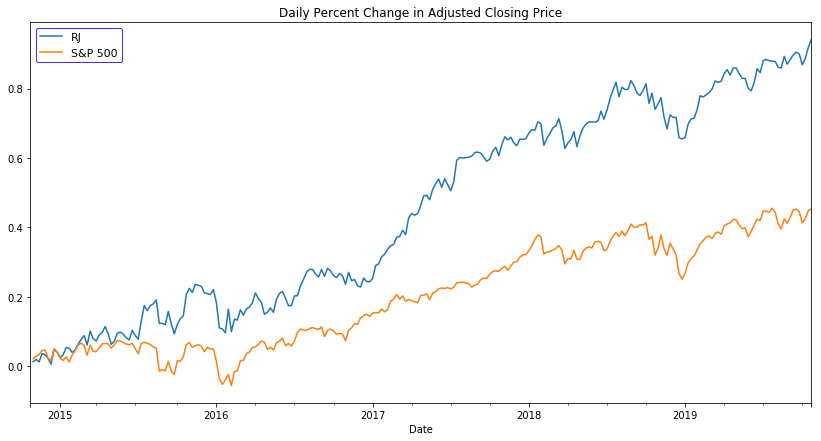

In [4]:
# ---------------------------------------------------------------------------- #
                    ### Defining start and end times ###
port_name = input("Welcome. To begin, please name your portfolio: \n")
years = int(input("Thank you. How many years of historical close data would you like to use?: \n"))
start = date.today() - dt.timedelta(days=365*years)
end = date.today()
                    ### Choosing Number of Equities ###
quantity_stocks= int(input("How many equities are in your portfolio? \n"))
stocks = [] # create empty portfolio

                    ### Choosing Equities ###
print("Name the tickers, using enter as a seperator.")
while quantity_stocks > 0:
    stocks.append(str(input()))
    quantity_stocks = quantity_stocks - 1
                    ### Getting data for equity prices ###
port = web.DataReader(stocks, 'yahoo', start, end)
SP500 = web.DataReader("^GSPC", 'yahoo', start, end)

                    ### Finding Applicable Frequency. 0 = Daily, 1 = Weekly ###
                    ### (0 is assumed and does not need programmed.) ###
freq = int(input("Would you like daily or weekly data?\nEnter 0 for daily or 1 for weekly.\n"))
if freq == 1:
    port = port.asfreq('W-WED', method='pad')
    SP500 = SP500.asfreq('W-WED', method='pad')

print("Loading...")

                    ### Seeing if they want a Spreadsheet, Graph, or both ###
                    ### 0 = Spreadsheet, 1 = MatPlotLib, 2 = Both ###
answer = int(input("Would you like to export this data into a spreadsheet, or display a graph?\nEnter 0 for a spreadsheet, 1 for a graph, or 2 for both.\n"))

                    ### Seeing if they want a Spreadsheet, Graph, or both ###

if answer == 0 or answer == 2: #Excel Export
    port.to_excel(str(port_name)+"_PyPortvas.xlsx")

if answer == 1 or answer == 2: #Graphing Historical Adjusted Close Data
    port = port.pct_change().cumsum()['Adj Close'] # Converting to percent change
    SP500 = SP500.pct_change().cumsum()['Adj Close'] # Converting to percent change
    port = port.mean(axis=1) ##Converting stocks to equal-weight portfolio
#    ax = port.plot(kind='bar')
#    ax.yaxis.set_major_formatter(mtick.PercentFormatter())



    port.plot(label=port_name,figsize=(14,7),title='Daily Percent Change in Adjusted Closing Price')
    SP500.plot(label='S&P 500')
    plt.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')
    plt.show()